## Table of Contents
- [Introduction](#introduction)
- [Exploratory Data Analysis Part 1 of 2](#exploratory-data-analysis-part-1-of-2)
- [Exploratory Data Analysis Part 2 of 2](#exploratory-data-analysis-part-2-of-2)
- [Data Preprocessing](#data-preprocessing)
- [Decision Tree](#decision-tree)
- [Natural Language Processing](#natural-language-processing)
- [Machine Learning Pipeline](#machine-learning-pipeline)
- [Conclusion](#conclusion)

## Introduction {#introduction}

Repairability of Consumer Electronics

Andrew Chau
kuzals@gmail.com
Summer 2023
BrainStation Toronto Data Science

This capstone project explores the success rate of repairing consumer electronics using various statistical modeling methods

## Exploratory Data Analysis Part 1 of 2 {#exploratory-data-analysis-part-1-of-2}

importing the required libraries for data manipulation (Pandas and NumPy) and visualization (MatPlotLib and Seaborn)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loading the dataset into a pandas dataframe using pd.read_csv()

In [35]:
df = pd.read_csv('Data/OpenRepairData_v0.3_aggregate_202303.csv')

df.info() provides an overview of the shape (103076 rows x 14 columns), names and data types of the columns, the size on disk (11MB+) of the dataset, and how complete each column is. <br>
Immediately we can see that "year_of_manufacture" and "product_age" are missing roughly 65,000 entries, and "problem" is missing about 15,000 entries. <br>
"repair_barrier_if_end_of_life" is only used for cases where an item cannot be fixed, so even though there are only 7268 entries, that number isn't out of the total 103076. <br>
Event_date would be more appropriate in datetime format.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103076 entries, 0 to 103075
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   id                             103076 non-null  object 
 1   data_provider                  103076 non-null  object 
 2   country                        103076 non-null  object 
 3   partner_product_category       103076 non-null  object 
 4   product_category               103076 non-null  object 
 5   product_category_id            103076 non-null  int64  
 6   brand                          103070 non-null  object 
 7   year_of_manufacture            37117 non-null   float64
 8   product_age                    37117 non-null   float64
 9   repair_status                  103076 non-null  object 
 10  repair_barrier_if_end_of_life  7268 non-null    object 
 11  group_identifier               103076 non-null  object 
 12  event_date                    

changing event_date to datetime format using pd.to_datetime()

In [37]:
df['event_date'] = pd.to_datetime(df['event_date'], format='%Y-%m-%d')

verifying the change for event_date from datatype object to datatype datetime using .info() <br>
change successful

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103076 entries, 0 to 103075
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   id                             103076 non-null  object        
 1   data_provider                  103076 non-null  object        
 2   country                        103076 non-null  object        
 3   partner_product_category       103076 non-null  object        
 4   product_category               103076 non-null  object        
 5   product_category_id            103076 non-null  int64         
 6   brand                          103070 non-null  object        
 7   year_of_manufacture            37117 non-null   float64       
 8   product_age                    37117 non-null   float64       
 9   repair_status                  103076 non-null  object        
 10  repair_barrier_if_end_of_life  7268 non-null    object        
 11  

quick look at the first few rows of the dataset using .head()
what stands out right away is that these rows are all in German
also, all the values are filled in

In [39]:
df.head(8)

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem
0,anstiftung_11539,anstiftung,DEU,Haushaltsgeräte ~ Siebträgermaschine,Coffee maker,36,Krups,1998.0,25.0,End of life,Spare parts too expensive,2711,2023-03-29,Pumpe defekt
1,anstiftung_11540,anstiftung,DEU,Elektro divers ~ Bluetooth Musik Box,Hi-Fi integrated,12,JBL,2016.0,7.0,Repairable,NaN,2711,2023-03-29,Akku lädt nicht
2,anstiftung_11541,anstiftung,DEU,Unterhaltungselektronik ~ Lautsprecher(boxen),Hi-Fi separates,13,Trust,2013.0,10.0,Fixed,NaN,2711,2023-03-29,Ohne Funktion
3,anstiftung_11542,anstiftung,DEU,Computer ~ Laptop,Laptop,16,Toshiba,2015.0,8.0,End of life,NaN,2711,2023-03-29,Netzteilbuchse und Grafikkarte defekt
4,anstiftung_11543,anstiftung,DEU,Elektro divers ~ Aktenvernichter,Paper shredder,21,Genie,2018.0,5.0,End of life,NaN,2711,2023-03-29,Getriebeschaden
5,anstiftung_11544,anstiftung,DEU,Haushaltsgeräte ~ Wasserkocher,Kettle,14,Support Plus,2018.0,5.0,End of life,No way to open product,2711,2023-03-29,ohne Funktion
6,anstiftung_11545,anstiftung,DEU,Haushaltsgeräte ~ Handrührgerät,Food processor,37,Severin,2020.0,3.0,End of life,Spare parts too expensive,2711,2023-03-29,Läuft zu schnell
7,anstiftung_11546,anstiftung,DEU,Unterhaltungselektronik ~ Radio,Portable radio,23,Philips,1993.0,30.0,Repairable,NaN,2711,2023-03-29,Kasette spielt nicht


quick look some rows at random in the dataset using .sample()
we see some missing values, and a mix of English and German entries

In [40]:
df.sample(8)

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem
37263,rcint_40906,Repair Café International,NLD,Household appliances electric ~ Coffee maker,Coffee maker,36,Krups Nespresso,2020.0,2.0,Repairable,NaN,0337,2022-06-11,"Cupje wordt niet doorgeprikt Niet gezocht , do..."
58017,restart_20304,The Restart Project,BEL,Coffee maker,Coffee maker,36,DeLonghi,2019.0,3.0,End of life,Repair information not available,Repair Café de Nivelles,2022-03-06,"Machine à café full automatique qui affiche ""d..."
11912,anstiftung_2418,anstiftung,DEU,"Elektro divers ~ Zahnbürste, elektrisch",Hair & beauty item,9,Unknown,NaN,NaN,Fixed,NaN,5073,2016-11-22,Funktionierte nicht mehr. Sie konnte durch Nac...
50144,rcint_53406,Repair Café International,NLD,Household appliances electric ~ Vacuum cleaner,Vacuum,34,Siemens,NaN,NaN,End of life,NaN,0004,2023-03-09,zuigt niet koolborstel zit vast
49218,rcint_1450,Repair Café International,NLD,Household appliances electric ~ Iron,Iron,40,Tefal,NaN,NaN,Repairable,NaN,0004,2017-06-15,"bedieningsknop v/h stomen ontbreekt, sproeistu..."
5249,anstiftung_7269,anstiftung,DEU,Haushaltsgeräte ~ Standmixer,Food processor,37,Philips,NaN,NaN,Repairable,NaN,2711,2021-10-20,Geht nicht an
56755,restart_11914,The Restart Project,SWE,Iron ~ clothes iron,Iron,40,Unknown,NaN,NaN,Fixed,NaN,Repair Cafe Malmö,2019-03-07,electric cord not working
84954,restart_35531,The Restart Project,GBR,Small kitchen item ~ Food mixer,Food processor,37,Morphy Richards,2016.0,6.0,Fixed,NaN,Burwell Repair Cafe,2022-11-06,Flashing Lights. No MovementWiring checked


Quick look at the last few rows of the dataset using .tail() <br>
Good to compare and contrast with the first few rows <br>
Many missing values, although all the ones that are entered are in English <br>

In [41]:
df.tail(8)

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem
103068,rcwales_7496,Repair Cafe Wales,GBR,Electrical Item ~ Small home electrical,Small home electrical,28,Unknown,NaN,NaN,End of life,Item too worn out,Mold,2022-10-30,Malfunction.
103069,rcwales_7497,Repair Cafe Wales,GBR,Electrical Item ~ Sewing machine,Sewing machine,27,Bernina,NaN,NaN,Repairable,NaN,Mold,2022-10-30,It is stuck on buttonhole mode and is seized up.
103070,rcwales_7498,Repair Cafe Wales,GBR,Electrical Item ~ Sewing machine,Sewing machine,27,Jones,NaN,NaN,Repairable,NaN,Mold,2022-10-30,Unknown probably motor.
103071,rcwales_7499,Repair Cafe Wales,GBR,Electrical Item ~ Small home electrical,Small home electrical,28,Permaplug,NaN,NaN,Fixed,NaN,Mold,2022-10-30,Extension cable for PAT testing.
103072,rcwales_7500,Repair Cafe Wales,GBR,Electrical Item ~ Misc,Misc,18,Unknown,NaN,NaN,Repairable,NaN,Mold,2022-10-30,Broken mirror.
103073,rcwales_7501,Repair Cafe Wales,GBR,Electrical Item ~ Sewing machine,Sewing machine,27,Toyota,NaN,NaN,Fixed,NaN,Mold,2022-10-30,Cotton reel spindle needs replacing.
103074,rcwales_7502,Repair Cafe Wales,GBR,Electrical Item ~ Sewing machine,Sewing machine,27,Brother,NaN,NaN,Fixed,NaN,Mold,2022-10-30,Bobbin not working.
103075,rcwales_7503,Repair Cafe Wales,GBR,Electrical Item ~ Vacuum,Vacuum,34,Hoover,NaN,NaN,Fixed,NaN,Mold,2022-10-30,It doesn’t turn on.


In [42]:
df.describe()

,product_category_id,year_of_manufacture,product_age
count,103076.000000,37117.000000,37117.000000
mean,23.369417,2008.472452,12.056543
std,10.205812,14.654064,14.560084
min,1.000000,1019.000000,-1.000000
25%,15.000000,2005.000000,4.000000
50%,24.000000,2013.000000,7.000000
75%,33.000000,2017.000000,15.000000
max,40.000000,2023.000000,998.000000


A few things look out of place from these descriptive statistics: product_category_id is not really a numerical value and should be converted. As mentioned before, the column year_of_manufacture has roughly 37,000 entries but is missing 70,000 values. Minimum value of 1019 is most likely an error that requires a closer look. Product age is calculated from year_of_manufacture (exact same number of rows) and will have incorrect values as well.

converting product_category_id from int64 datatype to object datatype using df[].apply()

In [43]:
df["product_category_id"]=df["product_category_id"].apply(str)

.info() to verify that product_category_id has indeed been changed to string / data type object

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103076 entries, 0 to 103075
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   id                             103076 non-null  object        
 1   data_provider                  103076 non-null  object        
 2   country                        103076 non-null  object        
 3   partner_product_category       103076 non-null  object        
 4   product_category               103076 non-null  object        
 5   product_category_id            103076 non-null  object        
 6   brand                          103070 non-null  object        
 7   year_of_manufacture            37117 non-null   float64       
 8   product_age                    37117 non-null   float64       
 9   repair_status                  103076 non-null  object        
 10  repair_barrier_if_end_of_life  7268 non-null    object        
 11  

In [45]:
df.describe()

,year_of_manufacture,product_age
count,37117.000000,37117.000000
mean,2008.472452,12.056543
std,14.654064,14.560084
min,1019.000000,-1.000000
25%,2005.000000,4.000000
50%,2013.000000,7.000000
75%,2017.000000,15.000000
max,2023.000000,998.000000


In [46]:
df.sort_values(by='year_of_manufacture', ascending=True).head(50)

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem
23855,rcint_3615,Repair Café International,NLD,Household appliances electric ~ Food processor,Food processor,37,KitchenAid,1019.0,998.0,Repairable,NaN,0016,2017-12-02,Vastgelopen onderdelen bestellen?
13163,rcint_44808,Repair Café International,AUS,Household appliances electric ~ Paper shredder,Paper shredder,21,Unknown,1900.0,123.0,Fixed,NaN,0333,2023-01-21,Not working Not seated correctly Adjusted the ...
13155,rcint_44790,Repair Café International,AUS,Display and sound equipment ~ Amplifier,Hi-Fi separates,13,Unknown,1900.0,123.0,Repairable,NaN,0333,2023-01-21,Blown Yes Advice given
13154,rcint_44789,Repair Café International,AUS,Clocks / alarm clocks ~ Alarm clock radio,Portable radio,23,Unknown,1900.0,123.0,End of life,No way to open product,0333,2023-01-21,No sound No
13160,rcint_44795,Repair Café International,AUS,Household appliances electric ~ Electric penci...,Small home electrical,28,Unknown,1900.0,123.0,Fixed,NaN,0333,2023-01-21,Won't sharpen Foreign object inside Taken apar...
13158,rcint_44793,Repair Café International,AUS,Household appliances electric ~ Electric kettle,Kettle,14,Unknown,1900.0,123.0,End of life,NaN,0333,2023-01-21,Not working Element buggered
18504,rcint_46791,Repair Café International,FRA,Tools electric ~ Strimmer,Power tool,24,ECHO,1900.0,123.0,End of life,NaN,0156,2023-03-11,"Impossible à démarrer, problème de réglage des..."
18510,rcint_46799,Repair Café International,FRA,Household appliances electric ~ Stick mixer / ...,Food processor,37,Riviera & Bar,1900.0,123.0,End of life,Item too worn out,0293,2023-03-11,moteur bloqué
18621,rcint_46944,Repair Café International,FRA,Tools electric ~ Multimeter,Small home electrical,28,M8,1900.0,123.0,End of life,NaN,0532,2023-02-18,Plus d'affichage à l'écran. Nappe de l'écran à...
18802,rcint_47156,Repair Café International,FRA,Computer equipment / phones ~ Printer,Printer/scanner,25,Epson,1900.0,123.0,Repairable,NaN,0183,2023-01-28,Bourrage papier Tige plastique délogée Remett...


After looking at the 50 lowest "year_of_manufacture" values, it seems reasonable to changing suspicious and outright incorrect "year_of_manufacture" and "product_age" values to NaN, cutoff before year 1920 <br>
Using .loc[], every row with year_of_manufacture 1919 and older gets year_of_manufacture AND product_age set to "NaN" as this empty value is better than data with questionable integrity

In [47]:
df.loc[df.year_of_manufacture.between(0.0, 1919.0), ['year_of_manufacture', 'product_age']] = np.nan

In [48]:
df.sort_values(by='product_age', ascending=True).head(50)

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem
6342,anstiftung_6237,anstiftung,DEU,Unterhaltungselektronik ~ CD-Player,Handheld entertainment device,10,Unknown,2021.0,-1.0,Unknown,NaN,2711,2020-10-21,Schaden auf der Platine
37383,rcint_29126,Repair Café International,NLD,Household appliances electric ~ Air fryer,Small kitchen item,29,Philips,2020.0,0.0,Fixed,NaN,0041,2020-02-01,kabelbreuk nieuw snoer
37126,rcint_24428,Repair Café International,NLD,Household appliances electric ~ Sewing machine,Sewing machine,27,Singer,2019.0,0.0,Fixed,NaN,0024,2019-11-02,Nieuwe naaimachine ; advies N.V.T. Uitleg gegeven
6872,anstiftung_6097,anstiftung,DEU,Unterhaltungselektronik ~ Lautsprecher(boxen),Hi-Fi separates,13,JBL,2020.0,0.0,Repairable,NaN,2711,2020-07-29,USB-Buchse kaputt
37496,rcint_34495,Repair Café International,NLD,Toys electric ~ Toy car,Toy,32,Unknown,2021.0,0.0,Fixed,NaN,0036,2021-06-01,doet niks los contact in de afstandsbediening ...
37127,rcint_24158,Repair Café International,NLD,Household appliances electric ~ Lamp / lighting,Lamp,15,Trio Leuchten,2019.0,0.0,Fixed,NaN,0016,2019-11-02,weerstand moet er in printplaat van dimmer def...
37497,rcint_51113,Repair Café International,NLD,Household appliances electric ~ Induction hob,Small kitchen item,29,SilverCrest,2022.0,0.0,End of life,Item too worn out,0412,2022-12-14,Werkt niet Is nat geworden Is nat geworden daa...
36184,rcint_3750,Repair Café International,NLD,Household appliances electric ~ Earphone,Headphones,11,Samsung,2017.0,0.0,End of life,NaN,0024,2017-12-02,snoertje is los
37128,rcint_24364,Repair Café International,NLD,Household appliances electric ~ Clipper / trimmer,Small home electrical,28,Surker,2019.0,0.0,End of life,NaN,0009,2019-11-02,werkt niet oplader werkt niet ?
37498,rcint_51114,Repair Café International,NLD,Household appliances electric ~ Foot warmer / ...,Small home electrical,28,Alpina,2022.0,0.0,Fixed,NaN,0192,2022-12-21,"slaat steeds af lastig te bedienen getest, uit..."


quick check of the distribution of the numerical values using .describe() to verify that the cleaning changes have been applied

In [49]:
df.describe()

,year_of_manufacture,product_age
count,37068.000000,37068.000000
mean,2008.631326,11.896749
std,13.229585,13.123295
min,1920.000000,-1.000000
25%,2006.000000,4.000000
50%,2013.000000,7.000000
75%,2017.000000,15.000000
max,2023.000000,103.000000


correcting 'product_age' values that are negative using .loc[], set them to 0

In [50]:
df.loc[df['product_age'] < 0, 'product_age'] = 0

quick check again of the distribution of the numerical values using .describe() to verify that the cleaning changes have been applied

In [51]:
df.describe()

,year_of_manufacture,product_age
count,37068.000000,37068.000000
mean,2008.631326,11.896776
std,13.229585,13.123269
min,1920.000000,0.000000
25%,2006.000000,4.000000
50%,2013.000000,7.000000
75%,2017.000000,15.000000
max,2023.000000,103.000000


In [52]:
df.head()

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem
0,anstiftung_11539,anstiftung,DEU,Haushaltsgeräte ~ Siebträgermaschine,Coffee maker,36,Krups,1998.0,25.0,End of life,Spare parts too expensive,2711,2023-03-29,Pumpe defekt
1,anstiftung_11540,anstiftung,DEU,Elektro divers ~ Bluetooth Musik Box,Hi-Fi integrated,12,JBL,2016.0,7.0,Repairable,NaN,2711,2023-03-29,Akku lädt nicht
2,anstiftung_11541,anstiftung,DEU,Unterhaltungselektronik ~ Lautsprecher(boxen),Hi-Fi separates,13,Trust,2013.0,10.0,Fixed,NaN,2711,2023-03-29,Ohne Funktion
3,anstiftung_11542,anstiftung,DEU,Computer ~ Laptop,Laptop,16,Toshiba,2015.0,8.0,End of life,NaN,2711,2023-03-29,Netzteilbuchse und Grafikkarte defekt
4,anstiftung_11543,anstiftung,DEU,Elektro divers ~ Aktenvernichter,Paper shredder,21,Genie,2018.0,5.0,End of life,NaN,2711,2023-03-29,Getriebeschaden


Outputting this cleaned dataframe to a new .csv file in the data folder ('Data/cleaned_OpenRepairData_v0.3_aggregate_202303.csv') to save progress and expedite future work <br>
index=False to maintain the current shape. Else a new column gets created

In [53]:
dfc = df
dfc.to_csv('Data/cleaned_OpenRepairData_v0.3_aggregate_202303.csv' , index=False)
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103076 entries, 0 to 103075
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   id                             103076 non-null  object        
 1   data_provider                  103076 non-null  object        
 2   country                        103076 non-null  object        
 3   partner_product_category       103076 non-null  object        
 4   product_category               103076 non-null  object        
 5   product_category_id            103076 non-null  object        
 6   brand                          103070 non-null  object        
 7   year_of_manufacture            37068 non-null   float64       
 8   product_age                    37068 non-null   float64       
 9   repair_status                  103076 non-null  object        
 10  repair_barrier_if_end_of_life  7268 non-null    object        
 11  

## Exploratory Data Analysis Part 2 of 2 {#exploratory-data-analysis-part-2-of-2}

After having loaded the dataset into a pandas dataframe, taken a look at the shape, values, datatypes, missing values, and having cleaned the data of errors and irregularities, we are now ready to explore the data itself. <br>
This section will look into the distribution of the data, and the relationships between the data features.

We begin with a look at the distribution of values in our Target column of "repair_status" <br>
"repair_status" is what we're looking to predict based off of select other columns / features <br>
We see four different values here: Fixed, End of Life (this is another term for 'broken'), 'Repairable', and Unknown <br>
Unknown only has 3400 values out of 103,076 and can be excluded <br>
'Repairable' is vague and optimistic so that will be set aside for now <br>

quick look at the target variable - 'repair_status'

In [54]:
dfc['repair_status'].value_counts()

Fixed          54295
End of life    24433
Repairable     20948
Unknown         3400
Name: repair_status, dtype: int64

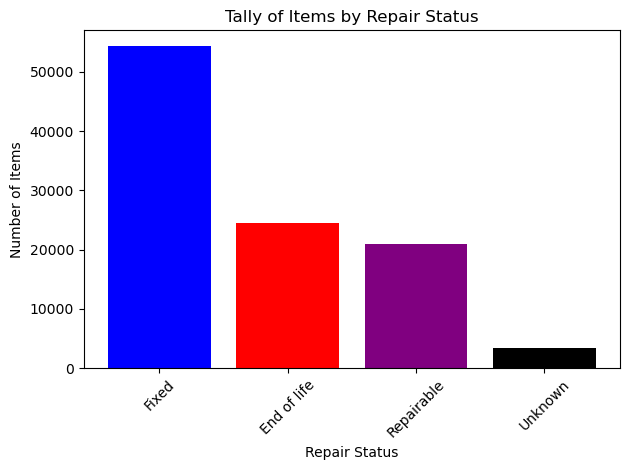

In [55]:
value_counts = dfc['repair_status'].value_counts()

plt.bar(value_counts.index, value_counts.values, color=['blue', 'red', 'purple', 'black'])
plt.xlabel('Repair Status')
plt.ylabel('Number of Items')
plt.title('Tally of Items by Repair Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We see that the majority of items in this dataset were able to be fixed, and a further 20% or so listed as "Repairable" <br>
A combined less than 25% are "End of Life" (fix improbable or inadvisable) or "Unknown"

In [56]:
dfc['product_category'].value_counts()

Vacuum                               7308
Lamp                                 6688
Hi-Fi separates                      6474
Laptop                               6472
Coffee maker                         6295
Power tool                           5521
Small kitchen item                   4987
Portable radio                       4668
Food processor                       4649
Small home electrical                3551
Watch/clock                          3406
Sewing machine                       3318
Mobile                               2792
TV and gaming-related accessories    2548
Toaster                              2392
Iron                                 2294
Printer/scanner                      2202
Large home electrical                2180
Kettle                               2167
Misc                                 2037
Toy                                  2016
Decorative or safety lights          1941
Hair & beauty item                   1881
Tablet                            

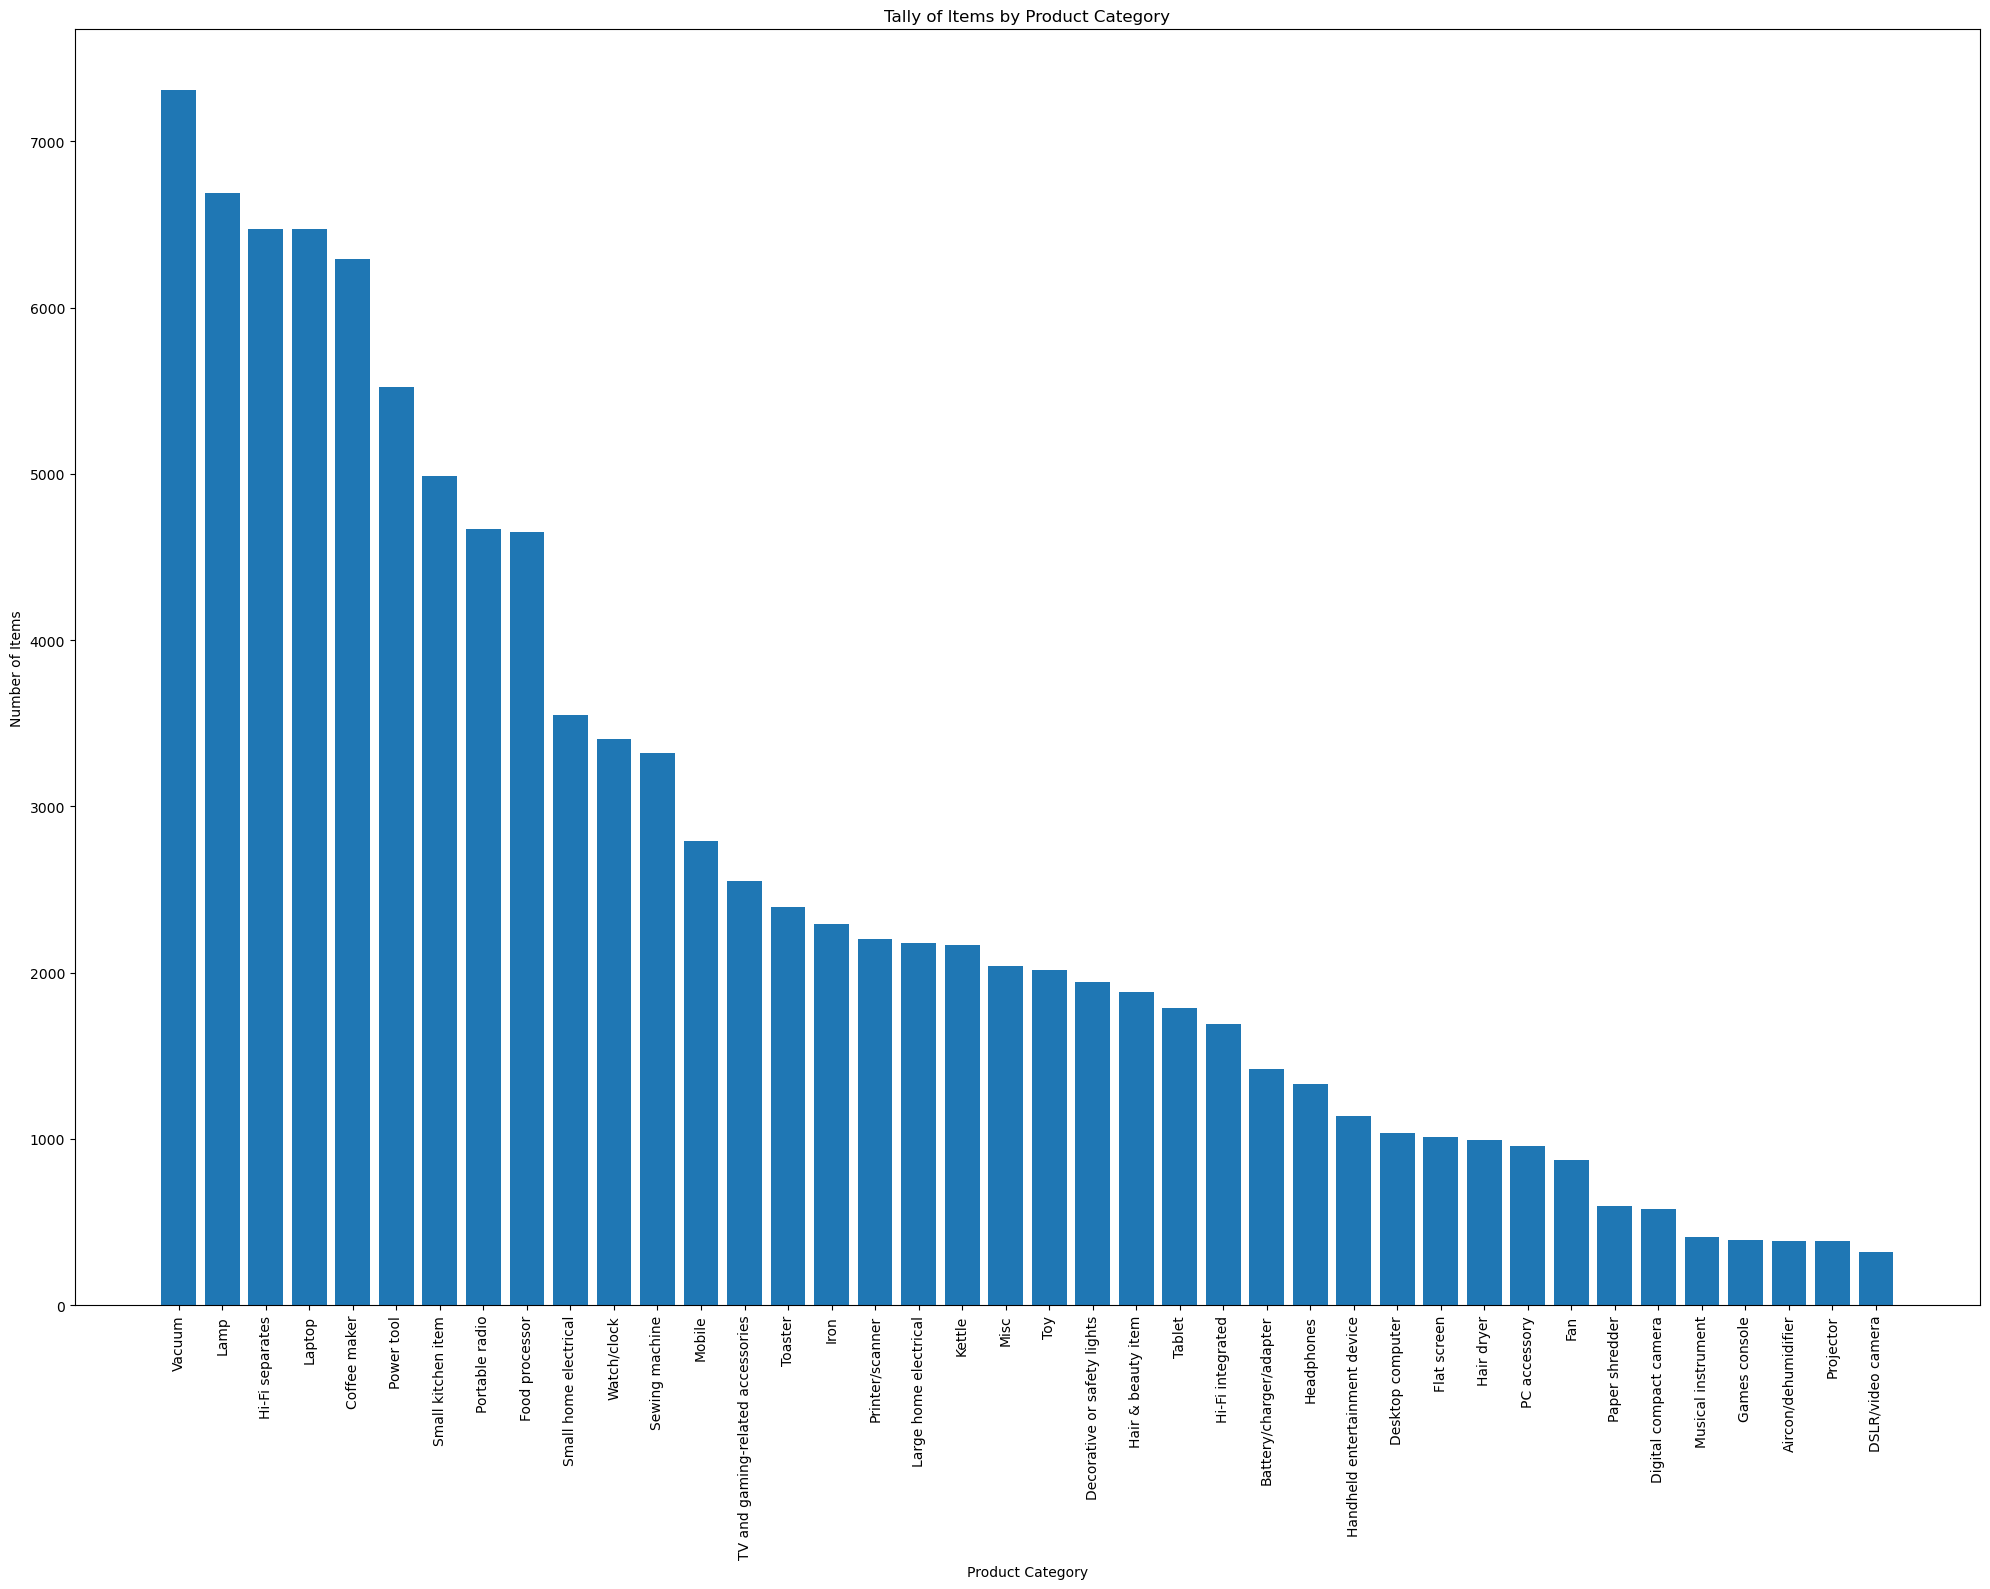

In [57]:
value_counts = dfc['product_category'].value_counts()

#plt.bar(value_counts.index, value_counts.values, color=['blue', 'red', 'purple', 'black'])
plt.figure(figsize=(20,16))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Product Category')
plt.ylabel('Number of Items')
plt.title('Tally of Items by Product Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [58]:
dfc['partner_product_category'].value_counts()

Household appliances electric ~ Coffee maker      3817
Household appliances electric ~ Vacuum cleaner    3117
Laptop medium ~ Laptop                            2341
Vacuum                                            2127
Lamp                                              2019
                                                  ... 
Misc ~ reclining chair                               1
Misc ~ power converter                               1
Misc ~ cable                                         1
Misc ~ electric spinning whee                        1
Misc ~ Foreuse à percussion                          1
Name: partner_product_category, Length: 9726, dtype: int64

In [59]:
dfc['brand'].value_counts().head(50)

Unknown           39030
Philips            5904
Sony               1996
Apple              1963
Bosch              1842
Samsung            1655
HP                 1646
Miele               929
Tefal               813
Dyson               784
Braun               766
Kenwood             713
Singer              652
Krups               651
AEG                 621
Panasonic           617
Siemens             598
Acer                590
Canon               581
Lenovo              550
Nespresso           539
DeLonghi            533
Dell                529
Black & Decker      525
Asus                477
Toshiba             472
Moulinex            368
Grundig             358
Russell Hobbs       349
Rowenta             311
LG                  310
JVC                 310
Kärcher             299
Electrolux          295
Brother             284
Roberts             282
Pfaff               266
SilverCrest         246
Yamaha              233
Pioneer             232
Denon               230
Bose            

In [60]:
dfc['brand'].unique()

array(['Krups', 'JBL', 'Trust', ..., 'Dihl', 'Solar light', 'Permaplug'],
      dtype=object)

In [61]:
dfc['country'].value_counts()

NLD    28318
GBR    27790
DEU    13475
BEL    13418
DNK     5163
FRA     4002
CAN     2415
ITA     1762
USA     1482
NOR     1156
ESP      776
AUS      631
ARG      617
SWE      543
NZL      307
JEY      230
AUT      181
HKG      178
ISR      166
IRL      157
TUN       98
CHE       95
ISL       91
ZAF       10
BEN        9
LUX        3
TWN        3
Name: country, dtype: int64

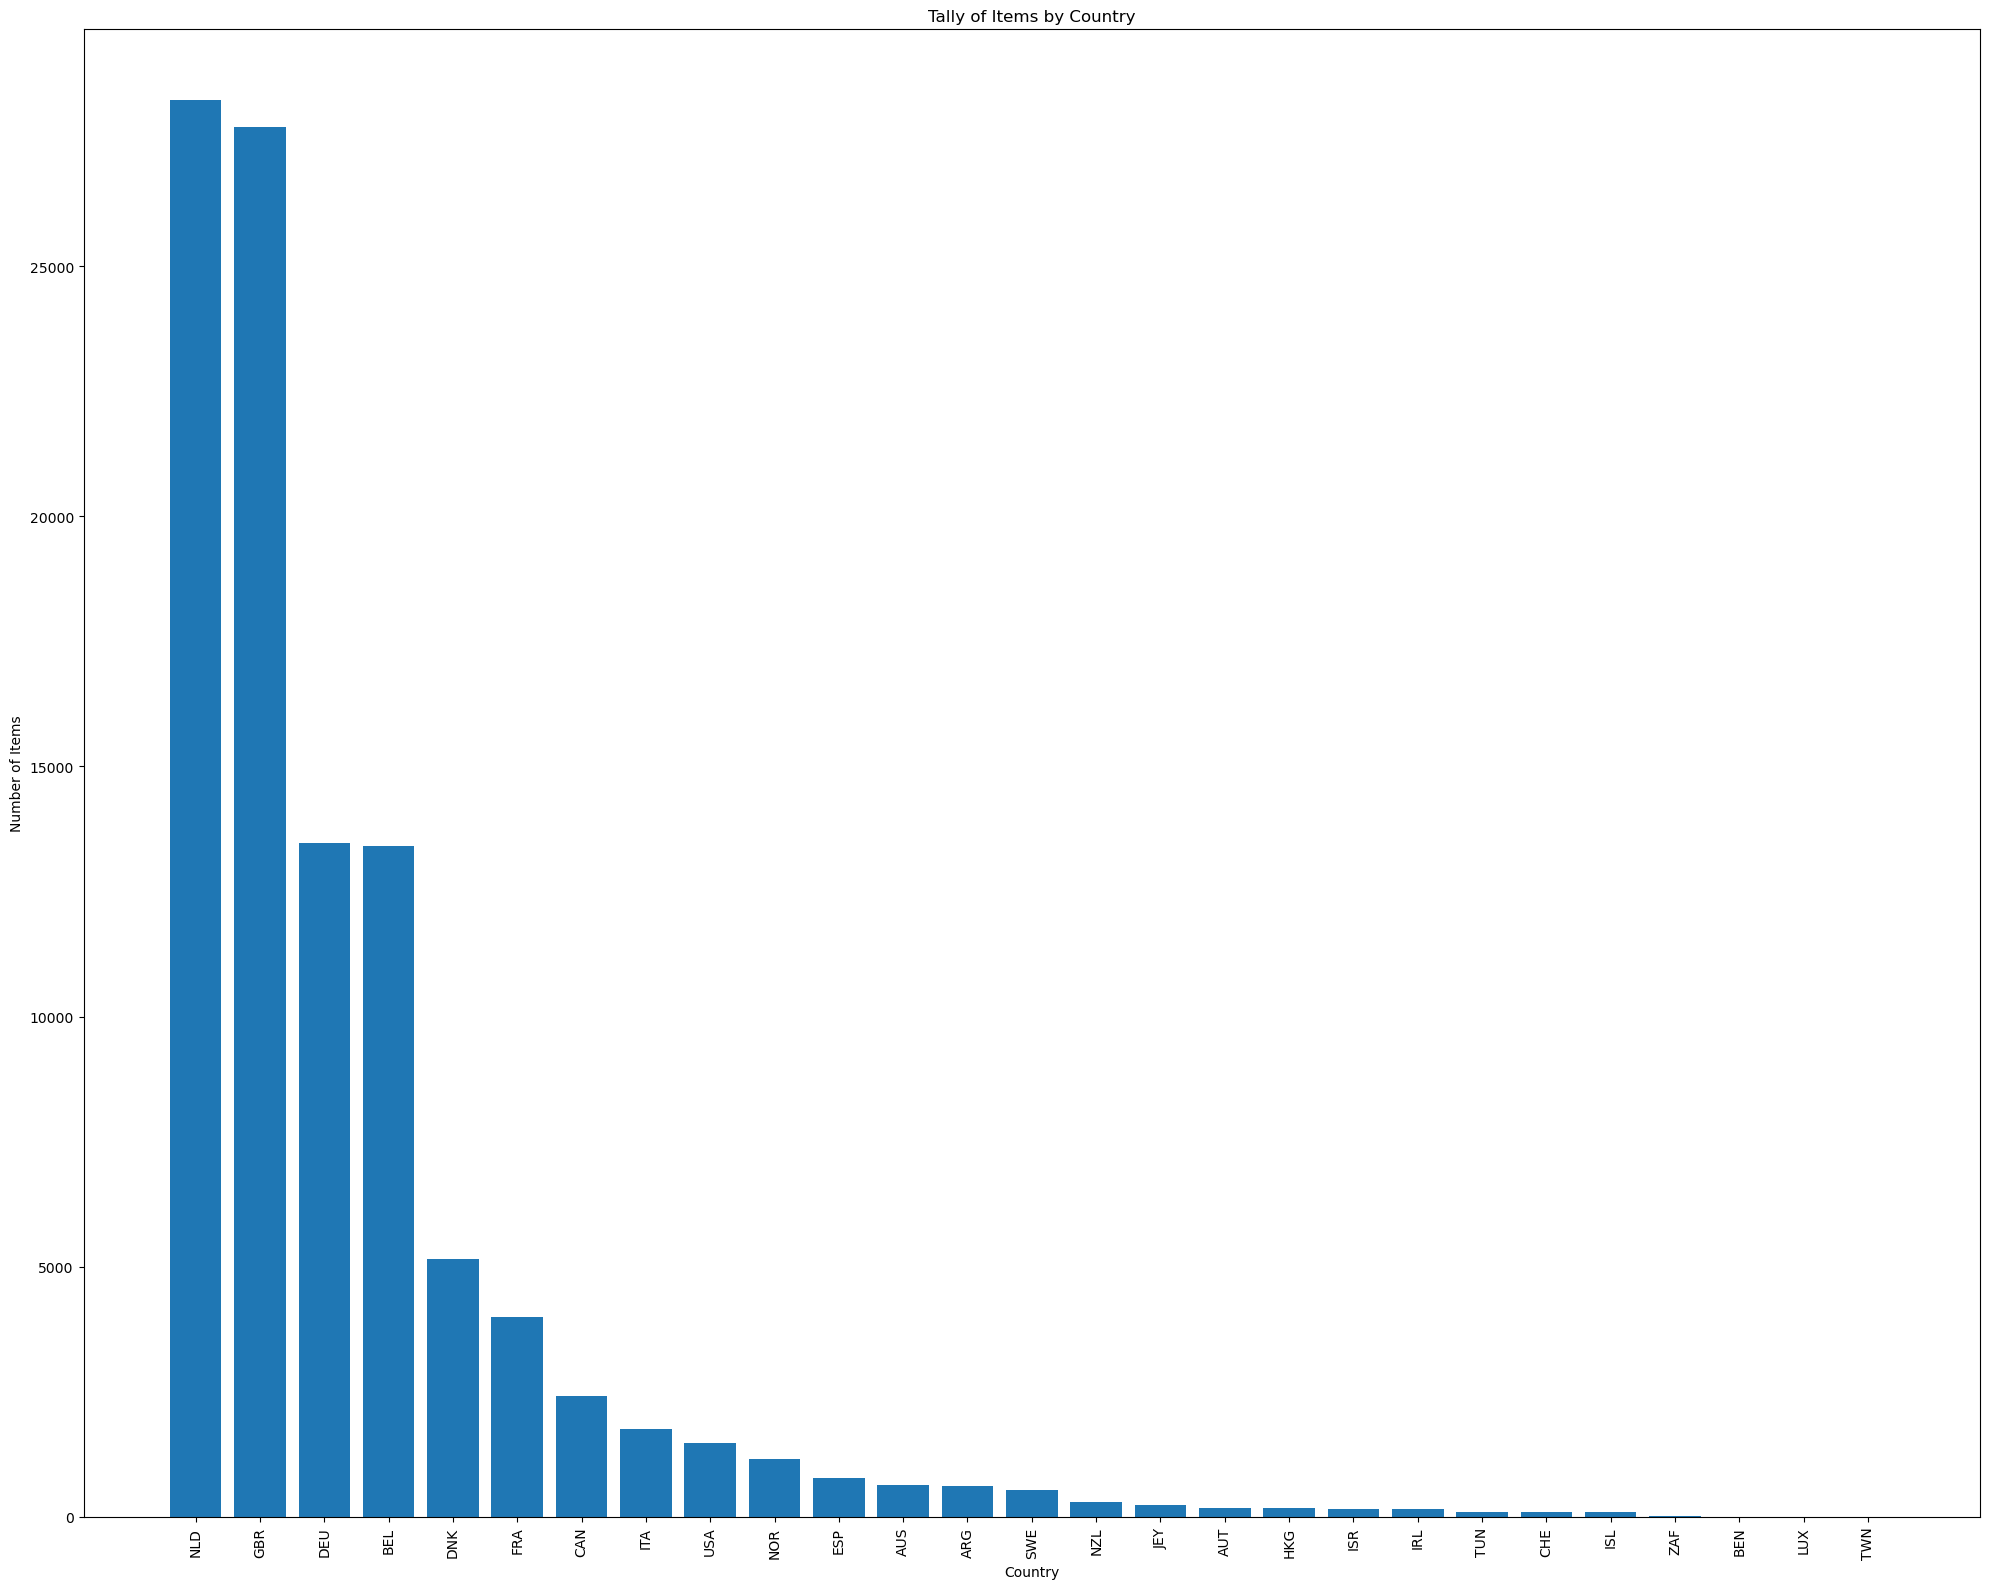

In [62]:
value_counts = dfc['country'].value_counts()
plt.figure(figsize=(20,16))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Country')
plt.ylabel('Number of Items')
plt.title('Tally of Items by Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The Netherlands accounts for almost a third of the entire dataset all on its own. Great Britain accounts for more than a quarter. Along with Germany and Belgium, these four countries make up 80% of the entire dataset. 

In [63]:
pd.crosstab(dfc['country'], dfc['product_category'])

product_category,Aircon/dehumidifier,Battery/charger/adapter,Coffee maker,DSLR/video camera,Decorative or safety lights,Desktop computer,Digital compact camera,Fan,Flat screen,Food processor,...,Projector,Sewing machine,Small home electrical,Small kitchen item,TV and gaming-related accessories,Tablet,Toaster,Toy,Vacuum,Watch/clock
country,,,,,,,,,,,,,,,,,,,,,
ARG,3,21,8,1,13,0,2,32,2,84,...,8,2,7,22,30,13,9,34,11,5
AUS,1,10,20,1,16,3,3,7,0,46,...,1,18,44,28,10,1,32,26,36,37
AUT,0,3,24,2,2,0,0,1,1,11,...,0,13,3,12,8,1,2,3,13,6
BEL,67,195,1123,19,220,104,68,98,227,609,...,49,383,271,1150,271,112,319,184,1123,181
BEN,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
CAN,10,21,16,3,22,166,7,45,4,59,...,2,30,38,77,12,219,38,14,55,81
CHE,1,1,5,0,1,2,2,1,1,0,...,2,2,0,4,2,0,1,2,3,2
DEU,28,222,714,122,277,93,94,38,245,855,...,61,453,648,533,324,167,294,262,793,291
DNK,12,132,164,7,120,84,29,28,67,314,...,37,341,345,192,121,43,119,133,302,172


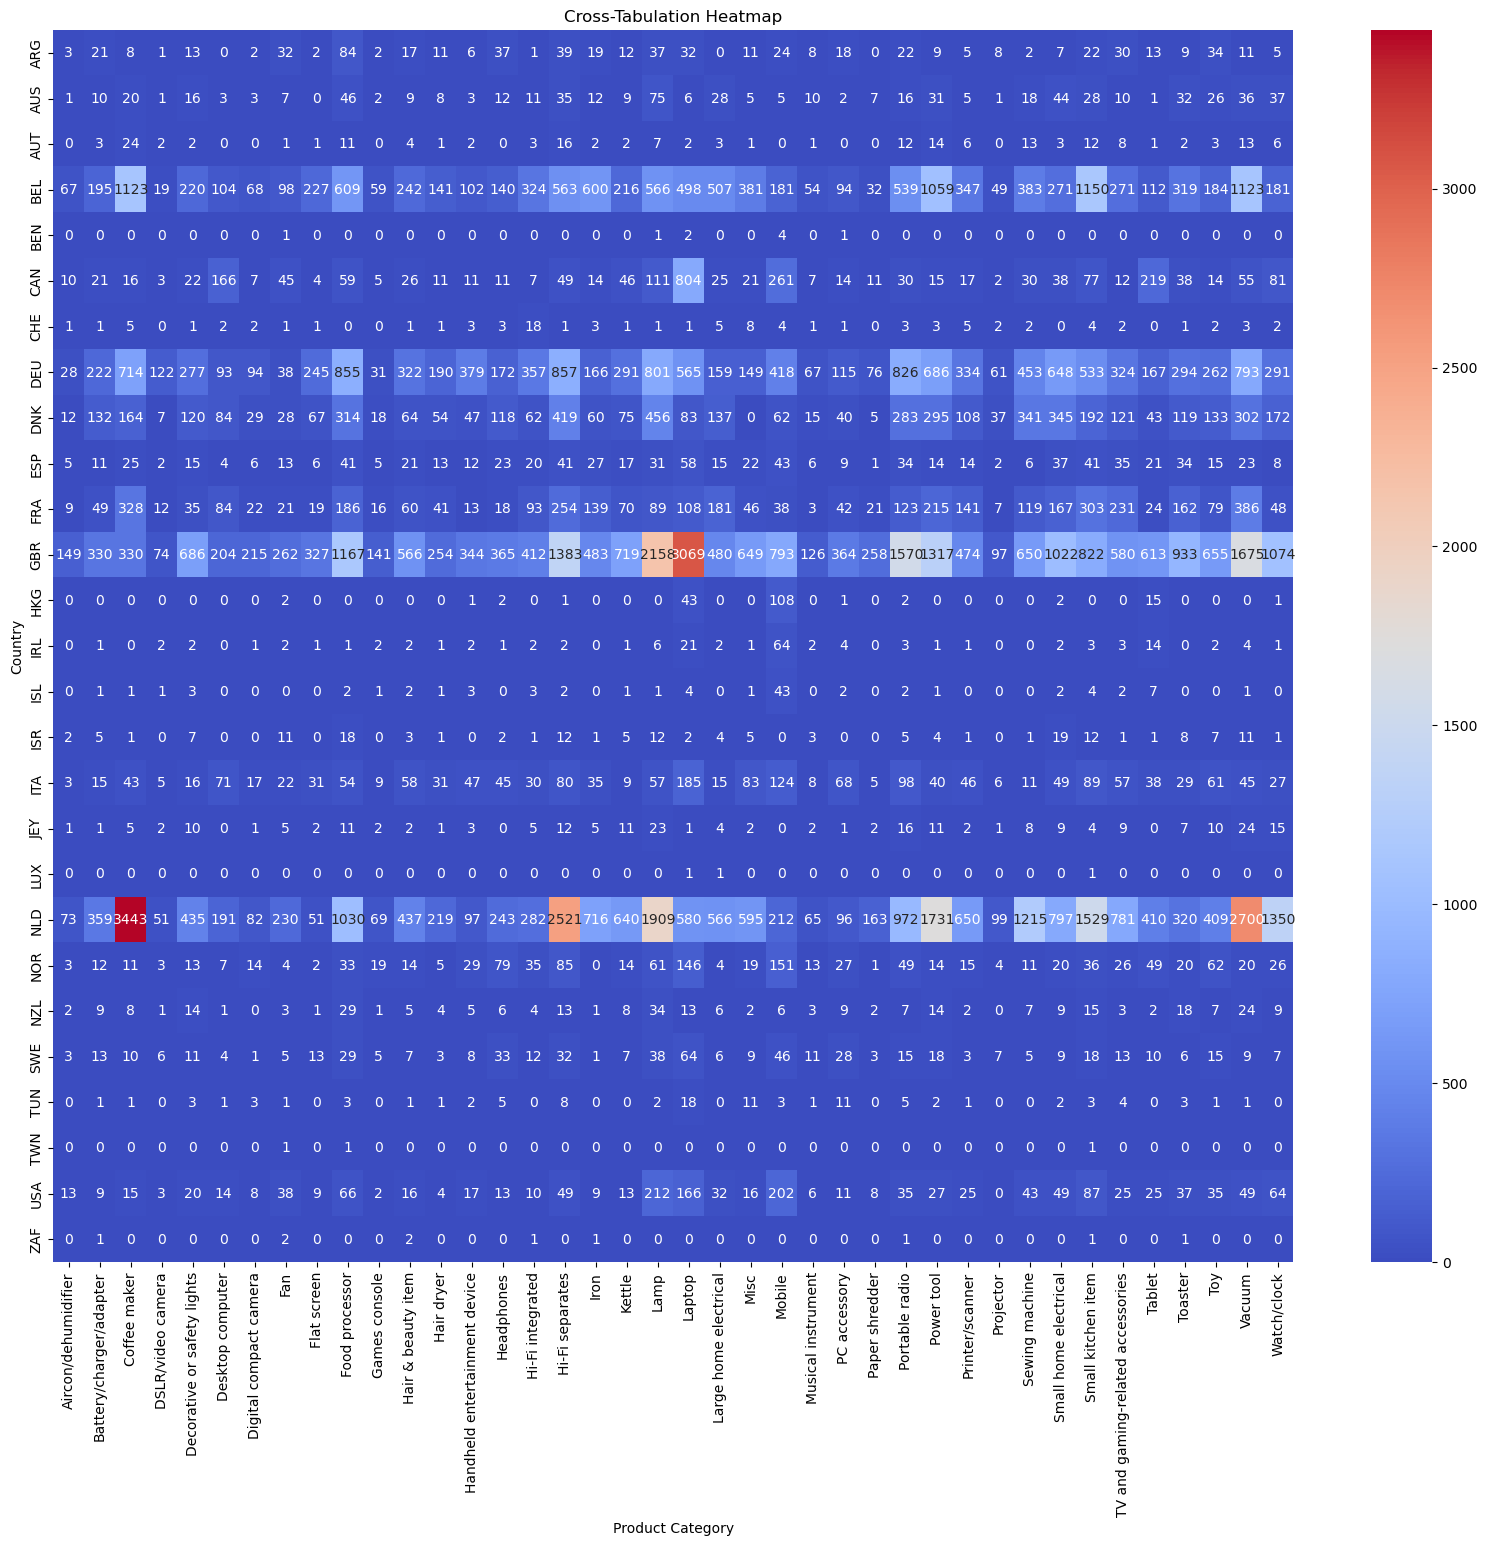

In [64]:
cross_tab = pd.crosstab(dfc['country'], dfc['product_category'])

# Create a heatmap using Seaborn
plt.figure(figsize=(20, 16))
#annotate the values, 'coolwarm' colour scheme
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm')

plt.xlabel('Product Category')
plt.ylabel('Country')
plt.title('Cross-Tabulation Heatmap')

plt.show()

Pandas crosstab of Country vs Counts of Repair Status using pd.crosstab() followed by a stacked bar chart visualizing the data

repair_status  End of life  Fixed  Repairable  Unknown
country                                               
NLD                   8786  15346        4184        2
GBR                   6660  13253        7144      733
DEU                   1983   7651        2379     1462
BEL                   3000   7161        3154      103
DNK                    797   3027         389      950
FRA                   1243   1864         893        2
CAN                    459   1260         696        0
ITA                    319   1072         361       10
USA                    127    846         417       92
NOR                    176    604         376        0
ARG                    141    465          11        0
ESP                    158    393         223        2
SWE                     67    294         160       22
AUS                    245    275         111        0
NZL                     67    145          78       17
JEY                     40    134          55        1
AUT       

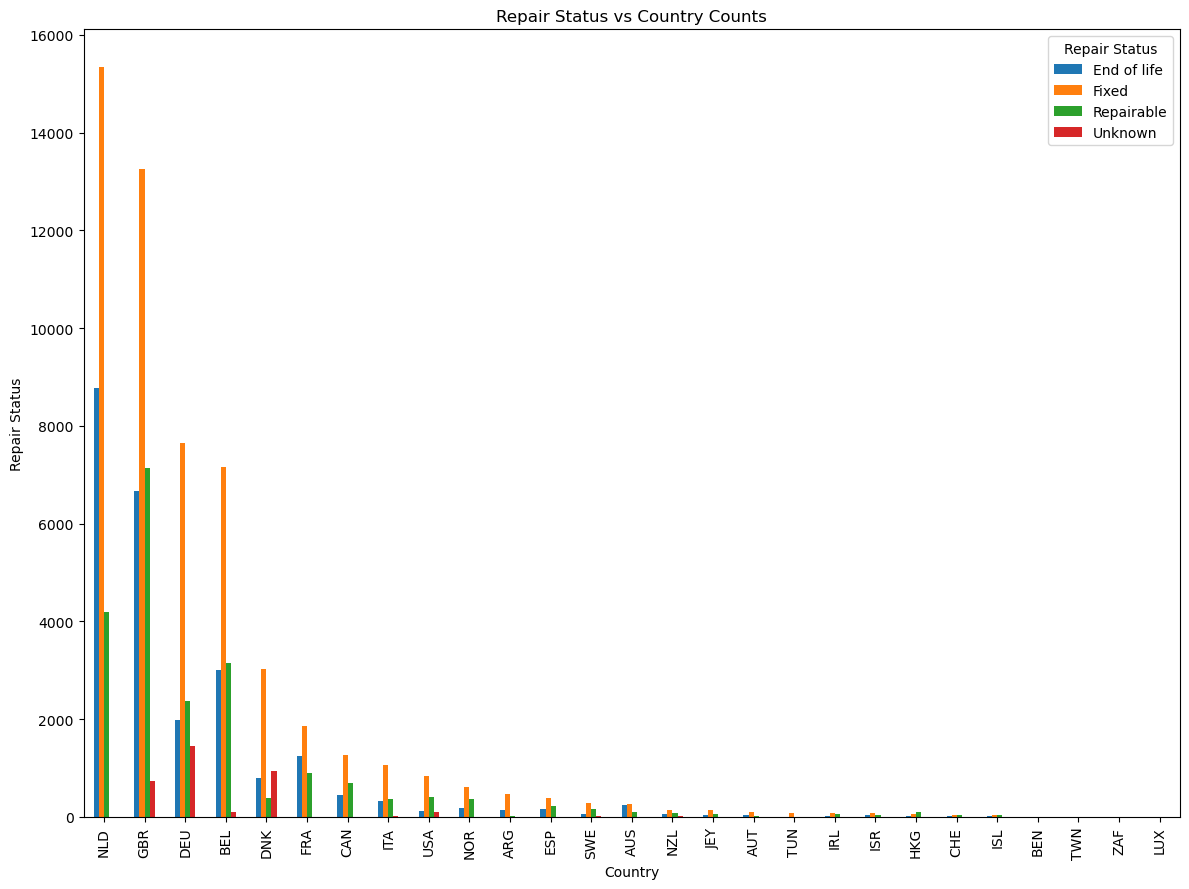

In [65]:
cross_tab = pd.crosstab(dfc['country'], dfc['repair_status'])
cross_tab_sorted = cross_tab.sort_values(by='Fixed', ascending=False)
print(cross_tab_sorted)

cross_tab_sorted.plot(kind='bar', figsize=(12, 9))
plt.xlabel('Country')
plt.ylabel('Repair Status')
plt.title('Repair Status vs Country Counts')
plt.legend(title='Repair Status')
plt.tight_layout()
plt.show()

Looks like items are able to be fixed far more often than not, irrespective of the country in which the attempt was made

In [67]:
cross_tab = pd.crosstab(dfc['country'], dfc['product_category'])
print(cross_tab)

product_category  Aircon/dehumidifier  Battery/charger/adapter  Coffee maker  \
country                                                                        
ARG                                 3                       21             8   
AUS                                 1                       10            20   
AUT                                 0                        3            24   
BEL                                67                      195          1123   
BEN                                 0                        0             0   
CAN                                10                       21            16   
CHE                                 1                        1             5   
DEU                                28                      222           714   
DNK                                12                      132           164   
ESP                                 5                       11            25   
FRA                                 9   

exploring the relationship between repair_status and brand

In [80]:
cross_tab = pd.crosstab(dfc['repair_status'], dfc['brand'])
print(cross_tab)

brand          "Princess" fruitpers  (missed)  -  - onbekend  ....  /  1930s  \
repair_status                                                                  
End of life                       1         0  1           0     1  2      0   
Fixed                             0         1  3           0     0  0      0   
Repairable                        0         0  0           1     0  0      1   
Unknown                           0         0  0           0     0  0      0   

brand          1960's wooden table lamp  1960s misc  1byone  ...  zeppelin  \
repair_status                                                ...             
End of life                           0           0       1  ...         0   
Fixed                                 1           0       0  ...         0   
Repairable                            0           1       0  ...         1   
Unknown                               0           0       0  ...         0   

brand          zig zag  zigzag Deluxe Krëfel  zond

In [69]:
cross_tab = pd.crosstab(dfc['repair_status'], dfc['product_age'])
print(cross_tab)

product_age    0.0    0.1    0.2    0.3    0.4    0.5    0.6    0.7    0.8    \
repair_status                                                                  
End of life       63      1      1      1      0     25      0      1      0   
Fixed            121      2      3      7      1     88      0      0      3   
Repairable        32      2      5      1      0     43      2      0      3   
Unknown            5      0      0      0      0      1      0      0      0   

product_age    0.9    ...  92.0   93.0   95.0   97.0   98.0   99.0   100.0  \
repair_status         ...                                                    
End of life        0  ...      1      1      0      0      1      3      3   
Fixed              1  ...      6      6      0      1      6      9     13   
Repairable         0  ...      5      0      1      0      1      1      6   
Unknown            0  ...      0      0      0      0      0      0      1   

product_age    101.0  102.0  103.0  
repair_status

exploring the relationship between product_age and repair_status.

repair_status  End of life  Fixed  Repairable  Unknown
product_age                                           
79.0                   0.0    1.0         0.0      0.0
16.5                   0.0    1.0         0.0      0.0
101.0                  0.0    1.0         0.0      0.0
74.0                   0.0    1.0         0.0      0.0
0.4                    0.0    1.0         0.0      0.0
...                    ...    ...         ...      ...
0.7                    1.0    0.0         0.0      0.0
0.6                    0.0    0.0         1.0      0.0
2.1                    0.0    0.0         1.0      0.0
2.3                    0.0    0.0         1.0      0.0
2.6                    1.0    0.0         0.0      0.0

[141 rows x 4 columns]


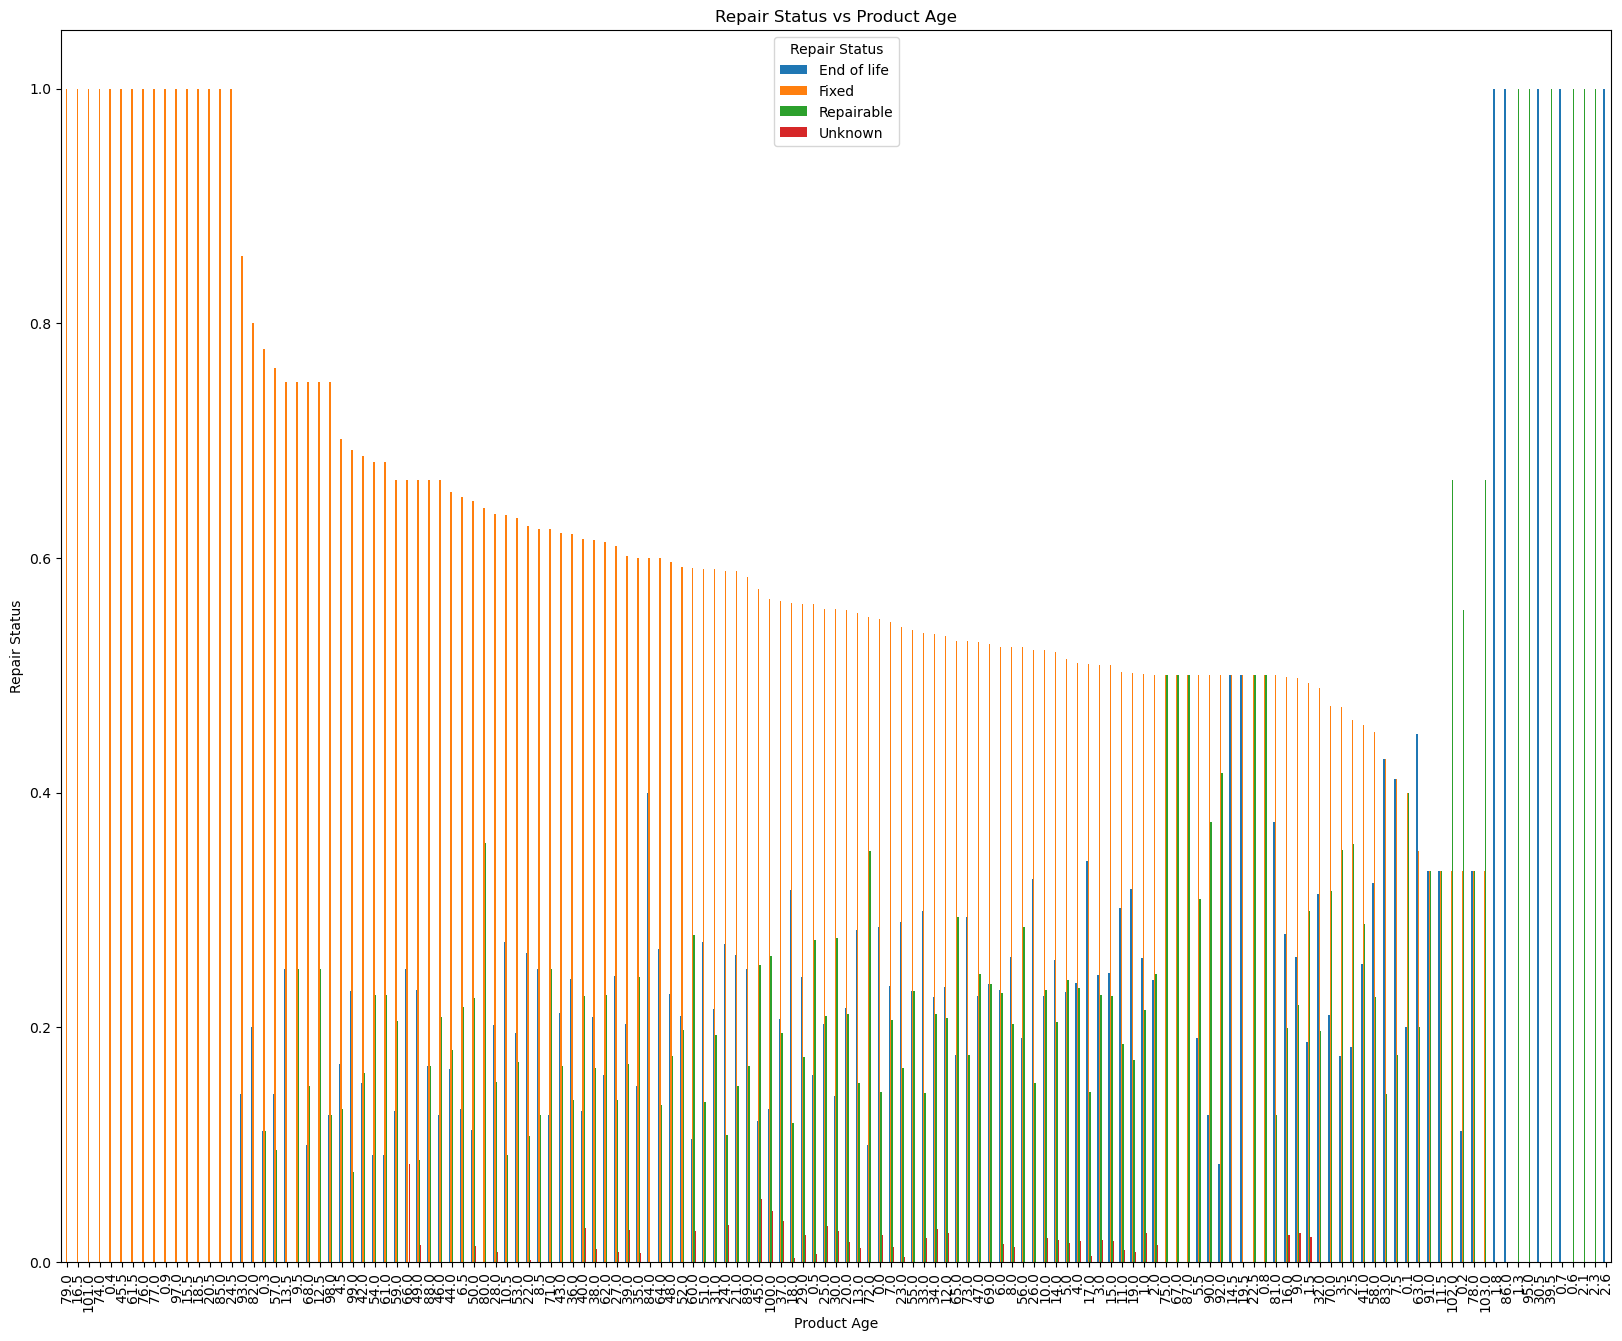

In [78]:
qf = df.copy()

cross_tab = pd.crosstab(qf['product_age'], qf['repair_status'], normalize='index')
cross_tab_sorted = cross_tab.sort_values(by='Fixed', ascending=False)
print(cross_tab_sorted)


#plt.figure(figsize=(20, 16))
#cross_tab.plot(kind='bar')
cross_tab_sorted.plot(kind='bar', figsize=(20, 16))
plt.xlabel('Product Age')
plt.ylabel('Repair Status')
plt.title('Repair Status vs Product Age')
plt.legend(title='Repair Status')
plt.show()

In [ ]:
cross_tab_sorted.to_csv('product_cat_vs_repair_stat.csv')

Very promising results! Right away we can see that the top 5 categories in terms of repairability success rate are all above 60% in the "fixed" status alone, not even including the additional opportunities identified by the 'repairable' column.

While the bottom 4 product categories have a success rate of under 40% (but never lower than 30%), and about half the dataset has a success rate between 40 and 50%, the combined Fixed + Repairable count is never under 50% for any of the product categories. 